### u1421126
#### Natural Language Processing Project

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
%matplotlib inline

* Data

In [39]:
df=pd.read_csv('yelp.csv')

In [40]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 546.9+ KB


In [42]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Created new column called "text length"**

In [43]:
df['text length']=df['text'].apply(len)

##### EDA

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Used FacetGrid from the seaborn library to create a grid of 5 histograms**

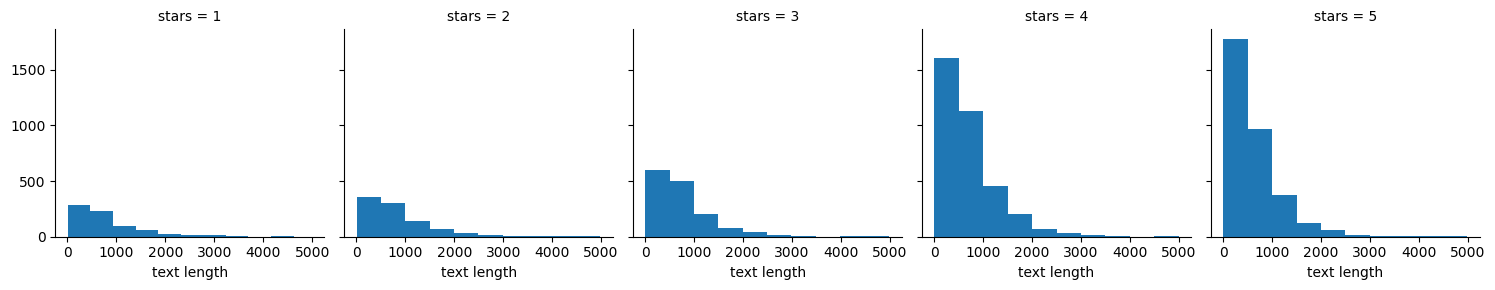

In [45]:
g = sns.FacetGrid(df,col='stars')
g.map(plt.hist,'text length')

**Created a boxplot of text length for each star category.**

<AxesSubplot:xlabel='stars', ylabel='text length'>

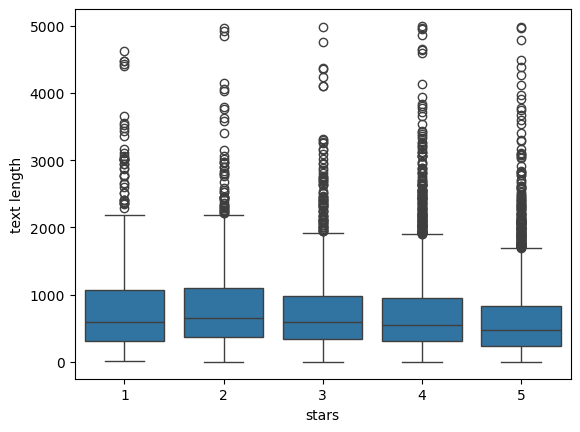

In [46]:
sns.boxplot(x='stars',y='text length',data=df)

**Created a countplot of the number of occurrences for each type of star rating.**

<AxesSubplot:xlabel='stars', ylabel='count'>

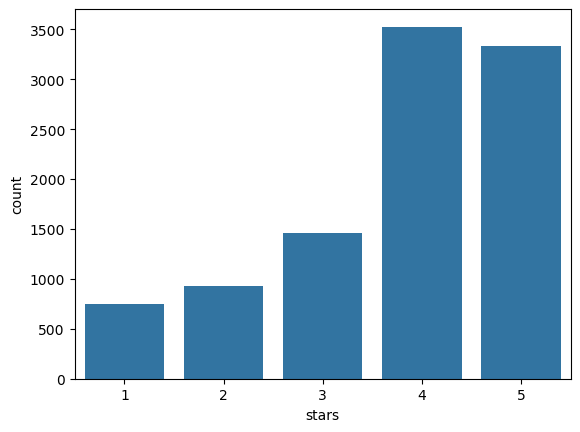

In [47]:
sns.countplot(x='stars',data=df)

**Used groupby to get the mean values of the numerical columns**

In [48]:
stars = df.groupby('stars').mean()
stars

<ipython-input-48-45b3ae0f7bee>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stars = df.groupby('stars').mean()


,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Used the corr() method on that groupby dataframe to produce this dataframe**

In [49]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Used seaborn to create a heatmap based off that .corr() dataframe:**

<AxesSubplot:>

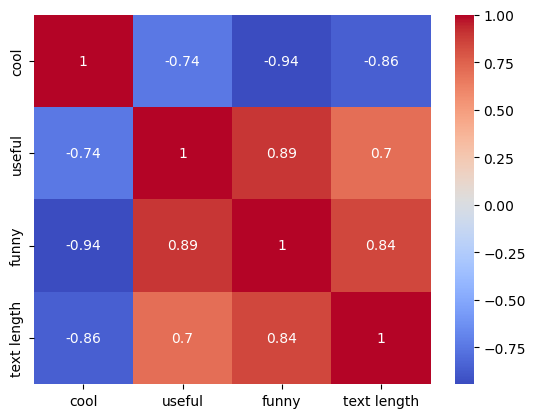

In [50]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

##### NLP Classification Task

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [51]:
yelp_class = df[(df.stars==1) | (df.stars==5)]

**Created two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class**

In [52]:
X = yelp_class['text']
y = yelp_class['stars']

**Import CountVectorizer and create a CountVectorizer object.**

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

**Used the fit_transform method on the CountVectorizer object**

In [54]:
X = cv.fit_transform(X)
type(X)

scipy.sparse._csr.csr_matrix

**Used train_test_split to split up the data**

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

##### Training a Model

In [56]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [57]:
nb.fit(X_train,y_train)

MultinomialNB()

##### Predictions and Evaluations

**Used the predict method off of nb to predict labels**

In [58]:
predictions = nb.predict(X_test)

**Created a confusion matrix and classification report using these predictions and y_test**

In [59]:
from sklearn.metrics import confusion_matrix,classification_report

In [60]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



##### Text Processing

**Import TfidfTransformer from sklearn.**

In [61]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [62]:
from sklearn.pipeline import Pipeline, FeatureUnion

**Created pipeline for CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [63]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

##### Train Test Split

**train test split on the yelp_class object.**

In [64]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [65]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

##### Predictions and Evaluation

**used the pipeline to predict from the X_test and create a classification report and confusion matrix**

In [66]:
predictions = pipeline.predict(X_test)

In [67]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]


/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226

